Bringing in libraries + bringing in dataset

https://raw.githubusercontent.com/lynn0032/MLCamp2021/main/mushrooms.csv

https://www.kaggle.com/uciml/mushroom-classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import cluster

mushrooms = pd.read_csv('https://raw.githubusercontent.com/lynn0032/MLCamp2021/main/mushrooms.csv')
len(mushrooms.columns)

23

Some summarization & EDA

In [ ]:
mushrooms.head()

class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]

In [ ]:
mushrooms.describe()

class cap-shape cap-surface  ... spore-print-color population habitat
count   8124      8124        8124  ...              8124       8124    8124
unique     2         6           4  ...                 9          6       7
top        e         x           y  ...                 w          v       d
freq    4208      3656        3244  ...              2388       4040    3148

[4 rows x 23 columns]

In [ ]:
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Cleaning the data

In [ ]:
#cleaning data categorical ==> quantitative
mushrooms_df = mushrooms.replace('?', np.nan)
mushrooms_df.dropna()
categorical = mushrooms.select_dtypes(include=['object']).columns
categorical = categorical.drop(['class'])
mushrooms_df = pd.get_dummies(mushrooms_df, columns=categorical)
mushrooms_df['class'] = np.where(mushrooms_df['class']=='e', 1, 0)
mushrooms_df.head()

class  cap-shape_b  cap-shape_c  ...  habitat_p  habitat_u  habitat_w
0      0            0            0  ...          0          1          0
1      1            0            0  ...          0          0          0
2      1            1            0  ...          0          0          0
3      0            0            0  ...          0          1          0
4      1            0            0  ...          0          0          0

[5 rows x 117 columns]

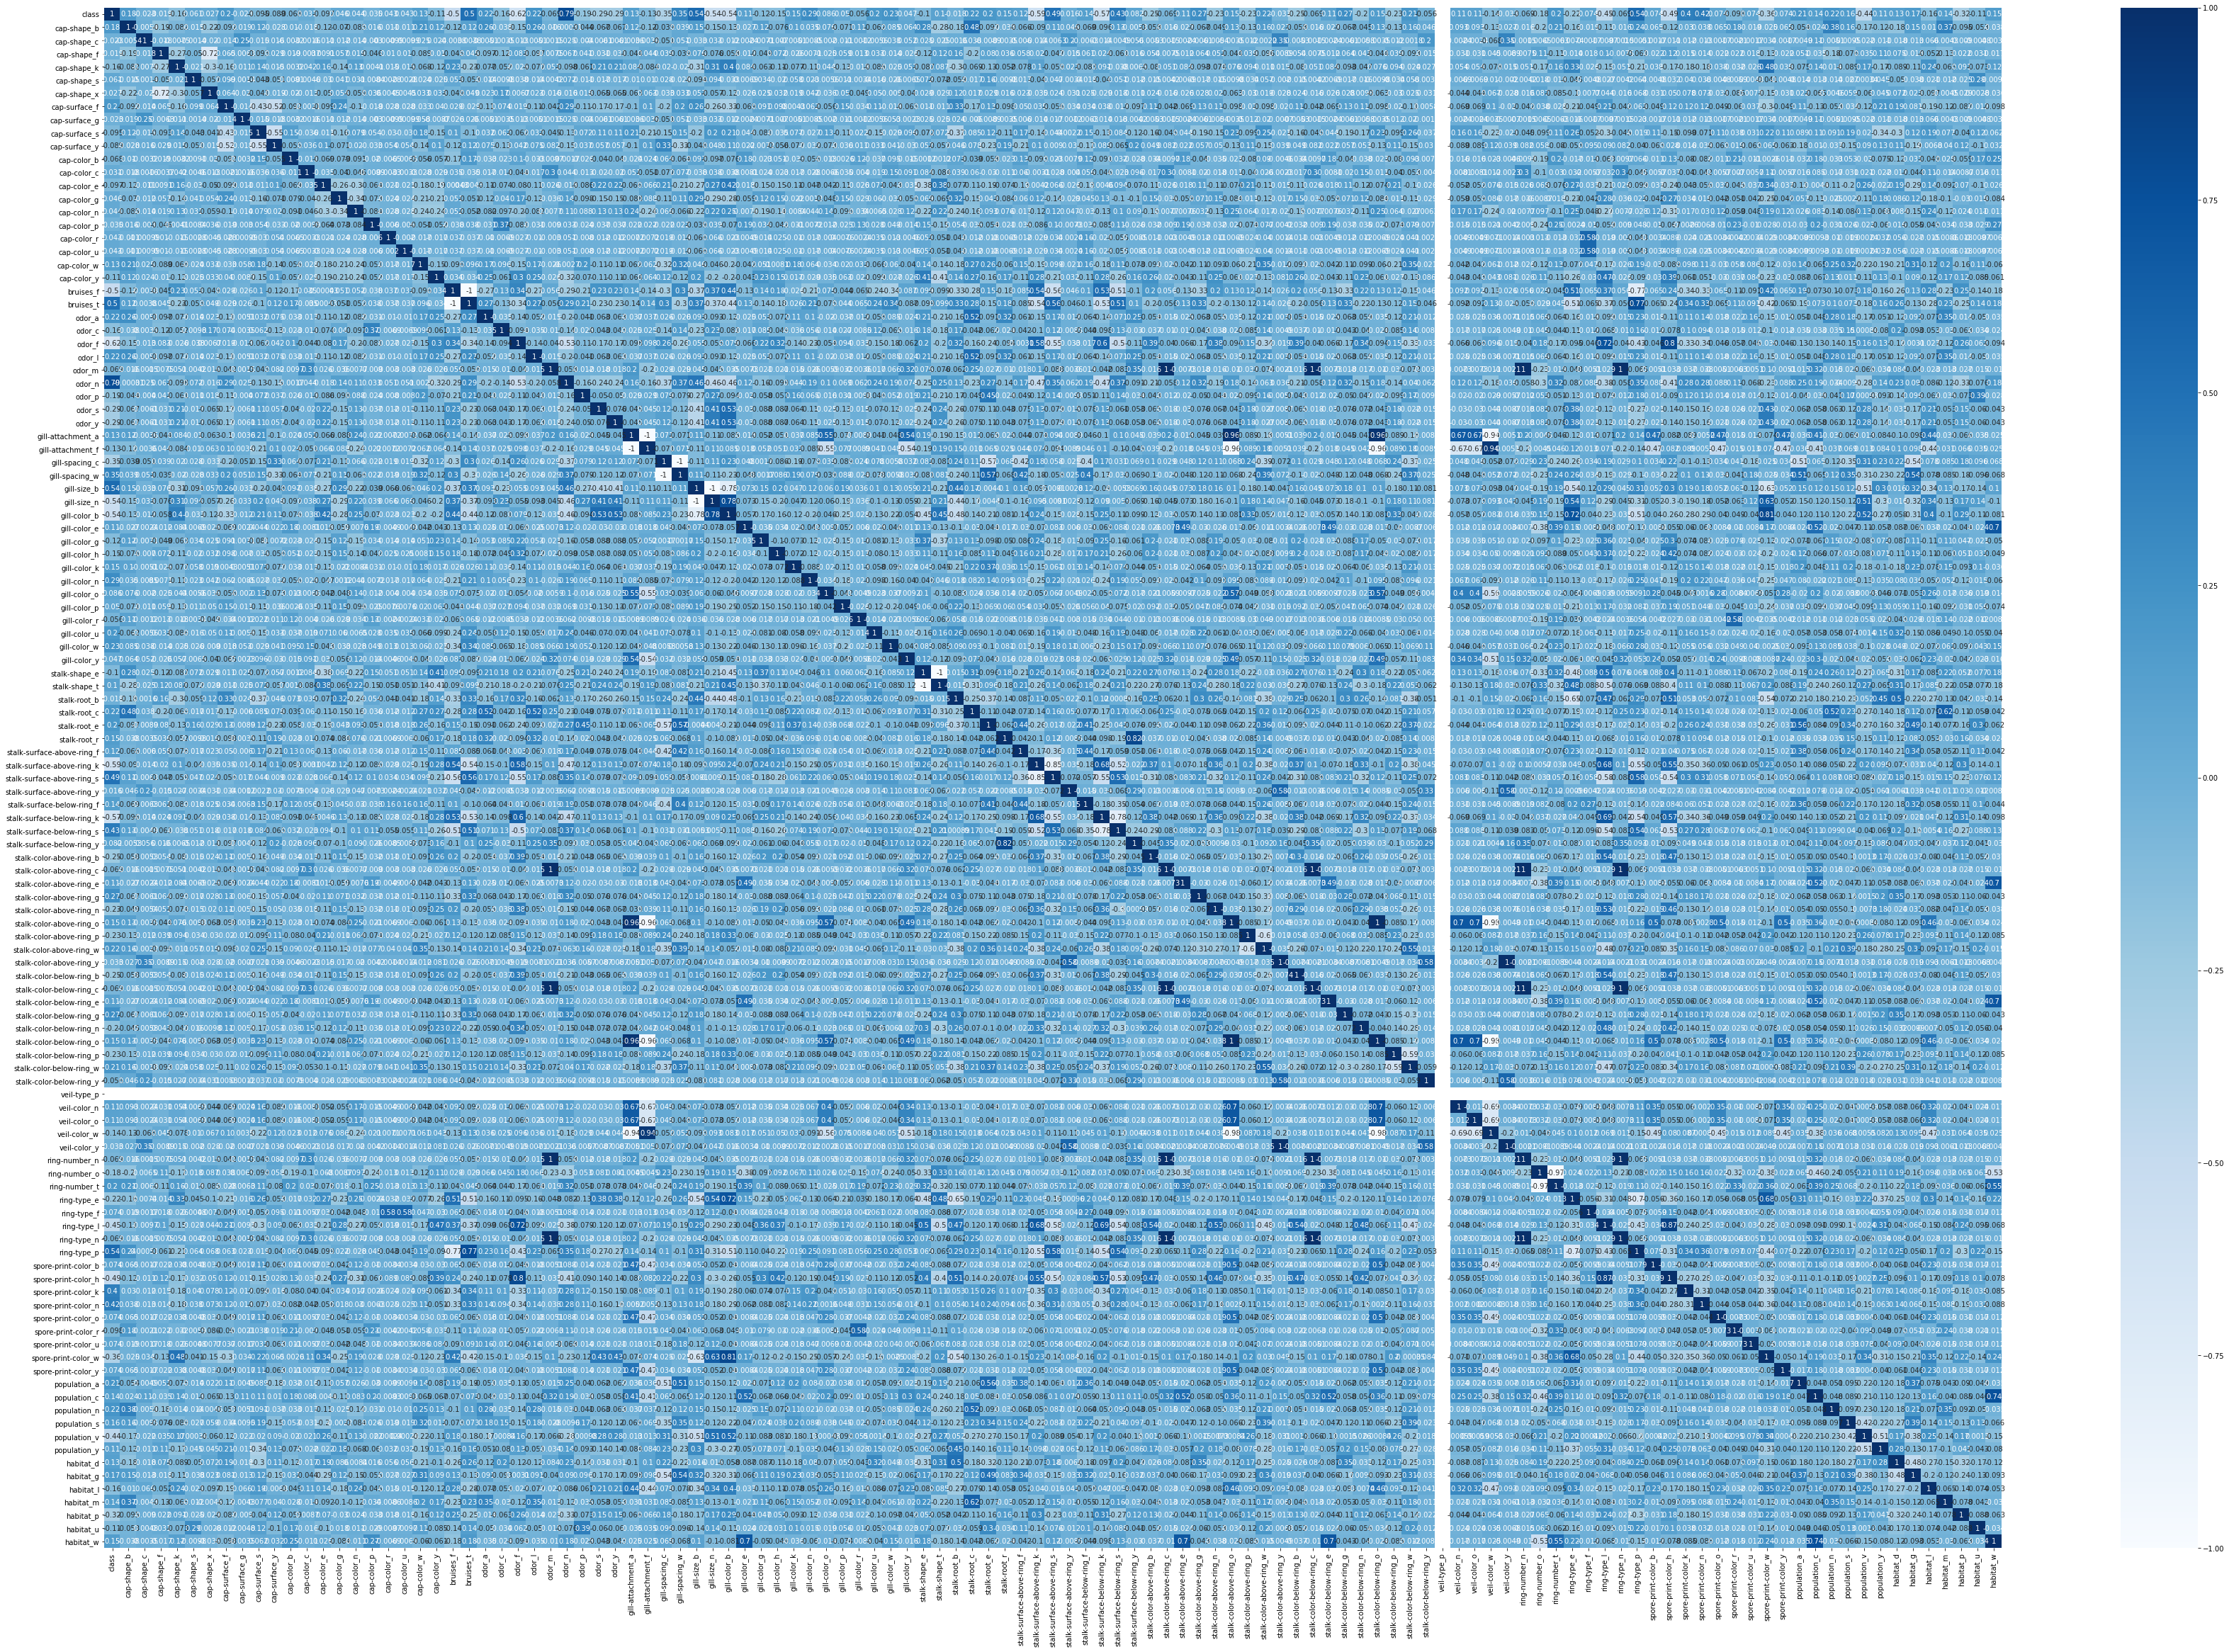

In [ ]:
#visualizing when done cleaning data 
fig = plt.subplots(figsize = (60, 40))
sns.heatmap(mushrooms_df.corr(), annot = True, cmap = 'Blues', center = 0)
plt.show()

Training Test Split

In [ ]:
X = mushrooms_df[mushrooms_df.columns[1:]]
y = mushrooms_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

'odor_n'

Nearest Neighbor

In [ ]:
k_list = list(range(1, 25, 2))
k_scores = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv = StratifiedKFold(shuffle=True), scoring = 'accuracy')
  k_scores.append(scores.mean())
k_best = k_list[k_scores.index(max(k_scores))]
k_best_score = max(k_scores)
print(k_best)
print(k_best_score)

1
1.0


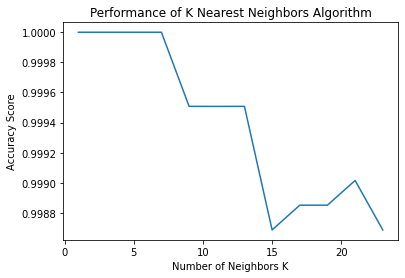

In [ ]:
plt.figure()
plt.title('Performance of K Nearest Neighbors Algorithm')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy Score')
plt.plot(k_list, k_scores)

plt.show()

Decision Tree

In [ ]:
#Train your decision tree classifier
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [ ]:
#Predict classes for the testing set
y_pred = dt.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Depth: " + str(dt.tree_.max_depth))
dt_best_score = cross_val_score(dt, X_train, y_train, cv = StratifiedKFold(shuffle=True), scoring = 'accuracy').mean()

Accuracy: 1.0
Depth: 7


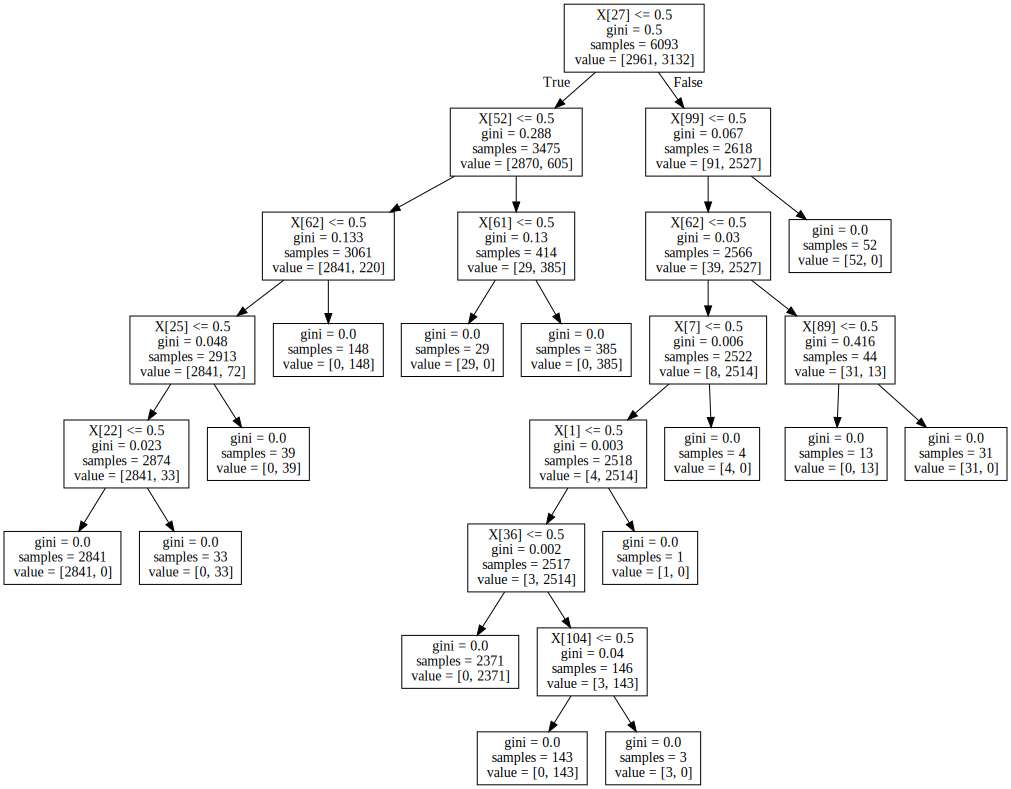

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
dt_list = list(range(1, 30))
dt_scores = []
for d in dt_list:
  dt = tree.DecisionTreeClassifier(max_depth=d)
  scores = cross_val_score(dt, X_train, y_train, cv = StratifiedKFold(shuffle=True), scoring = 'accuracy')
  dt_scores.append(scores.mean())
dt_best = dt_list[dt_scores.index(max(dt_scores))]
print(dt_best)
print(max(dt_scores))

8
1.0


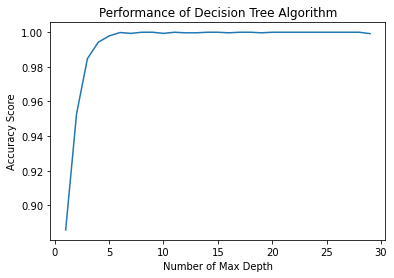

In [ ]:
plt.figure()
plt.title('Performance of Decision Tree Algorithm')
plt.xlabel('Number of Max Depth')
plt.ylabel('Accuracy Score')
plt.plot(dt_list, dt_scores)

plt.show()

Random Forest

In [ ]:
rf_list = list(range(1, 30))
rf_scores = []
for d in rf_list:
  rf = RandomForestClassifier(max_depth=d)
  scores = cross_val_score(rf, X_train, y_train, cv = StratifiedKFold(shuffle=True), scoring = 'accuracy')
  rf_scores.append(scores.mean())
rf_best = rf_list[rf_scores.index(max(rf_scores))]
print(rf_best)
print(max(rf_scores))

7
1.0


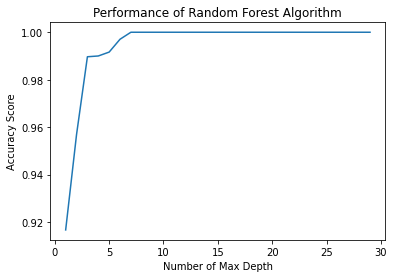

In [ ]:
plt.figure()
plt.title('Performance of Random Forest Algorithm')
plt.xlabel('Number of Max Depth')
plt.ylabel('Accuracy Score')
plt.plot(rf_list, rf_scores)

plt.show()

Support Vector Machines

In [ ]:
svc = svm.SVC(kernel='linear')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
svc = svm.SVC(kernel='poly')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
svc = svm.SVC(kernel='rbf')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
svc = svm.SVC(kernel='sigmoid')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9719350073855244